In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
import pandas_profiling
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns

In [2]:
df = pd.read_csv('drug_consumption.txt', header = None)
pd.set_option('display.max_columns', 50)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
df.columns = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", 
              "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", 
              "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

In [4]:
len(df)

1885

**EDA**

In [6]:
pandas_profiling.ProfileReport(df)


Number of variables,32
Number of observations,1885
Total Missing (%),0.0%
Total size in memory,471.3 KiB
Average record size in memory,256.0 B
Numeric,12
Categorical,19
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [6]:
#df.isnull().values.any()

In [7]:
# Dict = { "Age", : "Gender", 4: "Education",5:  "Country", 6:"Ethnicity", 7: "Nscore", 8: "Escore", 9: "Oscore", 
#  10 : "Ascore", 12: "Cscore", 13: "Impulsive",14: "SS", 15: "Alcohol",16: "Amphet",17: "Amyl", 18:"Benzos", 19:"Caff", 20:"Cannabis", 
#  21: "Choc", 22: "Coke",23:"Crack",24: "Ecstasy",25: "Heroin", 26:"Ketamine", 27:"Legalh", 28:"LSD", 29:"Meth", 30:"Mushrooms", 31:"Nicotine", 
#  32:"Semer", 33:"VSA"}



In [7]:
def transform_col_dict(dic, col, roun=True, num_round=5):
    col=list(col)
    new_col=[]
    for c in col:
        if roun:
            try:
                new_col.append(dic[np.round(c,num_round)])
            except:
                new_col.append(None)
        else:
            try: 
                new_col.append(dic[c])
            except:
                new_col.append(None)
    return new_col
    

In [8]:
Age_dict = {-0.95197: 21 ,-0.07854: 30 ,0.49788: 40 ,1.09449: 50 ,1.82213: 60 , 2.59171: 66 }

In [9]:
df.Age= transform_col_dict(Age_dict, df.Age)

In [10]:
df.Age.value_counts()

21    643
30    481
40    356
50    294
60     93
66     18
Name: Age, dtype: int64

In [11]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x > 0 else 1)

In [12]:
df['Gender']=1*(df.Gender>0)

In [13]:
# df['Gender'].replace({0.48246: 'Female', -0.48246:'Male'})
# 1 = Female 0 = Male

In [14]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,40,0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,30,1,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,40,1,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,21,0,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,40,0,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [15]:
#1.1+1.1+1.1
#df['Age'].iloc[5]

In [16]:
country_dict = {-0.09765:'Australia', 
         0.24923: 'Canada',
        -0.46841:'New Zealand',
        -0.28519 :'Other', 
         0.21128 :'Republic of Ireland ',
         0.96082 :'UK', 
        -0.57009: 'USA' }

In [17]:
df.Country= transform_col_dict(country_dict, df.Country)

In [18]:
df.Country.value_counts()

UK                      1044
USA                      557
Other                    118
Canada                    87
Australia                 54
Republic of Ireland       20
New Zealand                5
Name: Country, dtype: int64

In [19]:
df.head(15)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,40,0,-0.05921,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,30,1,1.98437,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,40,1,-0.05921,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,21,0,1.16365,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,40,0,1.98437,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,66,0,-1.22751,Canada,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,50,1,1.16365,USA,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,40,1,-1.73790,UK,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,40,0,-0.05921,Canada,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,60,1,1.16365,UK,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [20]:
Ethnicity_dict = { -0.50212: 'Asian',
                   -1.10702:'Black',
                    1.90725:'Mixed',
                    0.12600: 'White/Asian',
                   -0.22166: 'White/Black',
                    0.11440:'Other',
                   -0.31685:'White'}


In [21]:
df.Ethnicity = transform_col_dict(Ethnicity_dict, df.Ethnicity)

In [22]:
df.Ethnicity.value_counts()

White          1720
Other            63
Black            33
Asian            26
White/Black      20
White/Asian      20
Mixed             3
Name: Ethnicity, dtype: int64

In [23]:
Nscore ='''12 1 -3.46436 29 60 -0.67825 46 67 1.02119 
13 1 -3.15735 30 61 -0.58016 47 27 1.13281 
14 7 -2.75696 31 87 -0.46725 48 49 1.23461 
15 4 -2.52197 32 78 -0.34799 49 40 1.37297 
16 3 -2.42317 33 68 -0.24649 50 24 1.49158 
17 4 -2.34360 34 76 -0.14882 51 27 1.60383 
18 10 -2.21844 35 69 -0.05188 52 17 1.72012 
19 16 -2.05048 36 73 0.04257 53 20 1.83990 
20 24 -1.86962 37 67 0.13606 54 15 1.98437 
21 31 -1.69163 38 63 0.22393 55 11 2.12700 
22 26 -1.55078 39 66 0.31287 56 10 2.28554 
23 29 -1.43907 40 80 0.41667 57 6 2.46262 
24 35 -1.32828 41 61 0.52135 58 3 2.61139 
25 56 -1.19430 42 77 0.62967 59 5 2.82196 
26 57 -1.05308 43 49 0.73545 60 2 3.27393 
27 65 -0.92104 44 51 0.82562 
28 70 -0.79151 45 37 0.91093'''

In [24]:
Nscore_list=Nscore.split(' ')

In [25]:
Nscore_list

['12',
 '1',
 '-3.46436',
 '29',
 '60',
 '-0.67825',
 '46',
 '67',
 '1.02119',
 '\n13',
 '1',
 '-3.15735',
 '30',
 '61',
 '-0.58016',
 '47',
 '27',
 '1.13281',
 '\n14',
 '7',
 '-2.75696',
 '31',
 '87',
 '-0.46725',
 '48',
 '49',
 '1.23461',
 '\n15',
 '4',
 '-2.52197',
 '32',
 '78',
 '-0.34799',
 '49',
 '40',
 '1.37297',
 '\n16',
 '3',
 '-2.42317',
 '33',
 '68',
 '-0.24649',
 '50',
 '24',
 '1.49158',
 '\n17',
 '4',
 '-2.34360',
 '34',
 '76',
 '-0.14882',
 '51',
 '27',
 '1.60383',
 '\n18',
 '10',
 '-2.21844',
 '35',
 '69',
 '-0.05188',
 '52',
 '17',
 '1.72012',
 '\n19',
 '16',
 '-2.05048',
 '36',
 '73',
 '0.04257',
 '53',
 '20',
 '1.83990',
 '\n20',
 '24',
 '-1.86962',
 '37',
 '67',
 '0.13606',
 '54',
 '15',
 '1.98437',
 '\n21',
 '31',
 '-1.69163',
 '38',
 '63',
 '0.22393',
 '55',
 '11',
 '2.12700',
 '\n22',
 '26',
 '-1.55078',
 '39',
 '66',
 '0.31287',
 '56',
 '10',
 '2.28554',
 '\n23',
 '29',
 '-1.43907',
 '40',
 '80',
 '0.41667',
 '57',
 '6',
 '2.46262',
 '\n24',
 '35',
 '-1.32828',
 

In [26]:
len(Nscore_list)

147

In [27]:
Nscore_dict={}

In [28]:
list_3= Nscore_list[:3]

In [29]:
list_3

['12', '1', '-3.46436']

In [30]:
list_3 = Nscore_list[0:3]

In [31]:
float(list_3[1])

1.0

In [32]:
#range(int(0.01+len(Nscore_list)/3))

In [33]:
# i=0
# start=0
# end=3
# list_3_0= Nscore_list[start:end]

In [34]:
# start=3
# end=6
# list_3_1= Nscore_list[start:end]

In [35]:
# i=2
# list_3_2=Nscore_list[6:9]

In [36]:
i=[0,1,2,3]
start=[0,3, 6, 9]
end= [3,6,9,12]

In [37]:
Nscore_dict={}

In [38]:
for i in range(int(0.01+len(Nscore_list)/3)):
    start =3*i
    end= 3*i + 3
    list_3_i= Nscore_list[start:end]
    key= float(list_3_i[2])
    value= int(list_3_i[0]) 
    Nscore_dict[key]=value

In [39]:
Nscore_dict

{-3.46436: 12,
 -0.67825: 29,
 1.02119: 46,
 -3.15735: 13,
 -0.58016: 30,
 1.13281: 47,
 -2.75696: 14,
 -0.46725: 31,
 1.23461: 48,
 -2.52197: 15,
 -0.34799: 32,
 1.37297: 49,
 -2.42317: 16,
 -0.24649: 33,
 1.49158: 50,
 -2.3436: 17,
 -0.14882: 34,
 1.60383: 51,
 -2.21844: 18,
 -0.05188: 35,
 1.72012: 52,
 -2.05048: 19,
 0.04257: 36,
 1.8399: 53,
 -1.86962: 20,
 0.13606: 37,
 1.98437: 54,
 -1.69163: 21,
 0.22393: 38,
 2.127: 55,
 -1.55078: 22,
 0.31287: 39,
 2.28554: 56,
 -1.43907: 23,
 0.41667: 40,
 2.46262: 57,
 -1.32828: 24,
 0.52135: 41,
 2.61139: 58,
 -1.1943: 25,
 0.62967: 42,
 2.82196: 59,
 -1.05308: 26,
 0.73545: 43,
 3.27393: 60,
 -0.92104: 27,
 0.82562: 44,
 -0.79151: 28,
 0.91093: 45}

In [40]:
df.Nscore= transform_col_dict(Nscore_dict,df.Nscore)

In [41]:
df.head(15)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,40,0,-0.05921,UK,White/Asian,39,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,30,1,1.98437,UK,White,29,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,40,1,-0.05921,UK,White,31,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,21,0,1.16365,UK,White,34,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,40,0,1.98437,UK,White,43,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,66,0,-1.22751,Canada,White,29,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,50,1,1.16365,USA,White,31,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,40,1,-1.73790,UK,White,24,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,40,0,-0.05921,Canada,White,42,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,60,1,1.16365,UK,White,33,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [42]:
df.Nscore.describe()

count    1885.000000
mean       35.921485
std         9.135869
min        12.000000
25%        29.000000
50%        36.000000
75%        42.000000
max        60.000000
Name: Nscore, dtype: float64

In [43]:
Escore = '''16 2 -3.27393 31 55 -1.23177 45 91 0.80523 
18 1 -3.00537 32 52 -1.09207 46 69 0.96248 
19 6 -2.72827 33 77 -0.94779 47 64 1.11406 
20 3 -2.53830 34 68 -0.80615 48 62 1.28610 
21 3 -2.44904 35 58 -0.69509 49 37 1.45421 
22 8 -2.32338 36 89 -0.57545 50 25 1.58487 
23 5 -2.21069 37 90 -0.43999 51 34 1.74091 
24 9 -2.11437 38 106 -0.30033 52 21 1.93886 
25 4 -2.03972 39 107 -0.15487 53 15 2.12700 
26 21 -1.92173 40 130 0.00332 54 10 2.32338 
27 23 -1.76250 41 116 0.16767 55 9 2.57309 
28 23 -1.63340 42 109 0.32197 56 2 2.85950 
29 32 -1.50796 43 105 0.47617 58 1 3.00537 
30 38 -1.37639 44 103 0.63779 59 2 3.27393'''

In [44]:
Escore_list=Escore.split(' ')

In [45]:
Escore_list

['16',
 '2',
 '-3.27393',
 '31',
 '55',
 '-1.23177',
 '45',
 '91',
 '0.80523',
 '\n18',
 '1',
 '-3.00537',
 '32',
 '52',
 '-1.09207',
 '46',
 '69',
 '0.96248',
 '\n19',
 '6',
 '-2.72827',
 '33',
 '77',
 '-0.94779',
 '47',
 '64',
 '1.11406',
 '\n20',
 '3',
 '-2.53830',
 '34',
 '68',
 '-0.80615',
 '48',
 '62',
 '1.28610',
 '\n21',
 '3',
 '-2.44904',
 '35',
 '58',
 '-0.69509',
 '49',
 '37',
 '1.45421',
 '\n22',
 '8',
 '-2.32338',
 '36',
 '89',
 '-0.57545',
 '50',
 '25',
 '1.58487',
 '\n23',
 '5',
 '-2.21069',
 '37',
 '90',
 '-0.43999',
 '51',
 '34',
 '1.74091',
 '\n24',
 '9',
 '-2.11437',
 '38',
 '106',
 '-0.30033',
 '52',
 '21',
 '1.93886',
 '\n25',
 '4',
 '-2.03972',
 '39',
 '107',
 '-0.15487',
 '53',
 '15',
 '2.12700',
 '\n26',
 '21',
 '-1.92173',
 '40',
 '130',
 '0.00332',
 '54',
 '10',
 '2.32338',
 '\n27',
 '23',
 '-1.76250',
 '41',
 '116',
 '0.16767',
 '55',
 '9',
 '2.57309',
 '\n28',
 '23',
 '-1.63340',
 '42',
 '109',
 '0.32197',
 '56',
 '2',
 '2.85950',
 '\n29',
 '32',
 '-1.50796'

In [46]:
len(Escore_list)

126

In [47]:
Escore_dict = {}

In [48]:
for i in range(int(0.01+len(Escore_list)/3)):
    start =3*i
    end= 3*i + 3
    list_3_i= Escore_list[start:end]
    key= float(list_3_i[2])
    value= int(list_3_i[0]) 
    Escore_dict[key]=value

In [49]:
#Escore_dict

In [50]:
df.Escore= transform_col_dict(Escore_dict,df.Escore)

In [51]:
df.Escore.describe()

count    1885.000000
mean       39.576127
std         6.771769
min        16.000000
25%        35.000000
50%        40.000000
75%        44.000000
max        59.000000
Name: Escore, dtype: float64

In [52]:
Oscore = '''24 2 -3.27393 38 64 -1.11902 50 83 0.58331 
26 4 -2.85950 39 60 -0.97631 51 87 0.72330 
28 4 -2.63199 40 68 -0.84732 52 87 0.88309 
29 11 -2.39883 41 76 -0.71727 53 81 1.06238 
30 9 -2.21069 42 87 -0.58331 54 57 1.24033 
31 9 -2.09015 43 86 -0.45174 55 63 1.43533 
32 13 -1.97495 44 101 -0.31776 56 38 1.65653 
33 23 -1.82919 45 103 -0.17779 57 34 1.88511 
34 25 -1.68062 46 134 -0.01928 58 19 2.15324 
35 26 -1.55521 47 107 0.14143 59 13 2.44904 
36 39 -1.42424 48 116 0.29338 60 7 2.90161 
37 51 -1.27553 49 98 0.44585'''

In [53]:
Oscore_list = Oscore.split(' ')

In [54]:
len(Oscore_list)

105

In [55]:
Oscore_dict = { } 

In [56]:
for i in range(int(0.01+len(Oscore_list)/3)):
    start = 3*i
    End = start+3
    list_3_i= Oscore_list[start:end]
    key = float(list_3_i[2])
    value = int(list_3_i[0])
    Oscore_dict[key]= value 

In [57]:
len(Oscore_dict)

35

In [58]:
df.Oscore = transform_col_dict(Oscore_dict,df.Oscore )

In [59]:
#df.Oscore.value_counts()

In [60]:
Ascore = '''12 1 -3.46436 34 42 -1.34289 48 104 0.76096 
16 1 -3.15735 35 45 -1.21213 49 85 0.94156 
18 1 -3.00537 36 62 -1.07533 50 68 1.11406 
23 1 -2.90161 37 83 -0.91699 51 58 1.2861 
24 2 -2.78793 38 82 -0.76096 52 39 1.45039 
25 1 -2.70172 39 102 -0.60633 53 36 1.61108 
26 7 -2.53830 40 98 -0.45321 54 36 1.81866 
27 7 -2.35413 41 114 -0.30172 55 16 2.03972 
28 8 -2.21844 42 101 -0.15487 56 14 2.23427 
29 13 -2.07848 43 105 -0.01729 57 8 2.46262 
30 18 -1.92595 44 118 0.13136 58 7 2.75696 
31 24 -1.77200 45 112 0.28783 59 1 3.15735 
32 30 -1.62090 46 100 0.43852 60 1 3.46436 
33 34 -1.47955 47 100 0.59042'''

In [61]:
Ascore_list = Ascore.split(' ')

In [62]:
Ascore_list

['12',
 '1',
 '-3.46436',
 '34',
 '42',
 '-1.34289',
 '48',
 '104',
 '0.76096',
 '\n16',
 '1',
 '-3.15735',
 '35',
 '45',
 '-1.21213',
 '49',
 '85',
 '0.94156',
 '\n18',
 '1',
 '-3.00537',
 '36',
 '62',
 '-1.07533',
 '50',
 '68',
 '1.11406',
 '\n23',
 '1',
 '-2.90161',
 '37',
 '83',
 '-0.91699',
 '51',
 '58',
 '1.2861',
 '\n24',
 '2',
 '-2.78793',
 '38',
 '82',
 '-0.76096',
 '52',
 '39',
 '1.45039',
 '\n25',
 '1',
 '-2.70172',
 '39',
 '102',
 '-0.60633',
 '53',
 '36',
 '1.61108',
 '\n26',
 '7',
 '-2.53830',
 '40',
 '98',
 '-0.45321',
 '54',
 '36',
 '1.81866',
 '\n27',
 '7',
 '-2.35413',
 '41',
 '114',
 '-0.30172',
 '55',
 '16',
 '2.03972',
 '\n28',
 '8',
 '-2.21844',
 '42',
 '101',
 '-0.15487',
 '56',
 '14',
 '2.23427',
 '\n29',
 '13',
 '-2.07848',
 '43',
 '105',
 '-0.01729',
 '57',
 '8',
 '2.46262',
 '\n30',
 '18',
 '-1.92595',
 '44',
 '118',
 '0.13136',
 '58',
 '7',
 '2.75696',
 '\n31',
 '24',
 '-1.77200',
 '45',
 '112',
 '0.28783',
 '59',
 '1',
 '3.15735',
 '\n32',
 '30',
 '-1.62090

In [63]:
Ascore_dict = {}

In [64]:
for i in range(int(0.01 + len(Ascore_list)/3)):
    start = 3*i 
    End = start+3
    list_3_i = Ascore_list[start:end]
    key = float(list_3_i[2])
    value= int(list_3_i[0])
    Ascore_dict[key]= value            

In [65]:
len(Ascore_dict)

41

In [66]:
#df.Ascore.value_counts()

In [67]:
df.Ascore = transform_col_dict(Ascore_dict,df.Ascore)

In [68]:
Cscore = '''17 1 -3.46436 32 39 -1.25773 46 113 0.58489 
19 1 -3.15735 33 49 -1.13788 47 95 0.7583 
20 3 -2.90161 34 55 -1.01450 48 95 0.93949 
21 2 -2.72827 35 55 -0.89891 49 76 1.13407 
22 5 -2.57309 36 69 -0.78155 50 47 1.30612 
23 5 -2.42317 37 81 -0.65253 51 43 1.46191 
24 6 -2.30408 38 77 -0.52745 52 34 1.63088 
25 9 -2.18109 39 87 -0.40581 53 28 1.81175 
26 13 -2.04506 40 97 -0.27607 54 27 2.04506 
27 13 -1.92173 41 99 -0.14277 55 13 2.33337 
28 25 -1.78169 42 105 -0.00665 56 8 2.63199 
29 24 -1.64101 43 90 0.12331 57 3 3.00537 
30 29 -1.51840 44 111 0.25953 59 1 3.46436 
31 41 -1.38502 45 111 0.41594'''

In [69]:
Cscore_list = Cscore.split(' ')

In [70]:
Cscore_dict = {}

In [71]:
for i in range(int(0.01 + len(Cscore_list)/3)):
    start = 3*i
    End = start+ 3
    list_3_i = Cscore_list[start:end]
    key = float(list_3_i[2])
    value= int(list_3_i[0])
    Cscore_dict[key] = value

In [72]:
df.Cscore = transform_col_dict(Cscore_dict,df.Cscore )

In [73]:
df.Cscore.describe()

count    1885.000000
mean       41.437135
std         6.966625
min        17.000000
25%        37.000000
50%        42.000000
75%        46.000000
max        59.000000
Name: Cscore, dtype: float64

In [74]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,40,0,-0.05921,UK,White/Asian,39,36,42,37,42,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,30,1,1.98437,UK,White,29,52,55,48,41,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,40,1,-0.05921,UK,White,31,45,40,32,34,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,21,0,1.16365,UK,White,34,34,46,47,46,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,40,0,1.98437,UK,White,43,28,43,41,50,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [75]:
# Impulsive = '''-2.55524 20 1.06 
# -1.37983 276 14.64
# -0.71126 307 16.29
# -0.21712 355 18.83
# 0.19268 257 13.63
# 0.52975 216 11.46% 
# 0.88113 195 10.34% 
# 1.29221 148 7.85% 
# 1.86203 104 5.52% 
# 2.90161 7 0.37% ''' 

In [76]:
#Impulsive_list = Impulsive.split(' ')


In [77]:
#len(Impulsive_list)

In [78]:
#Impulsive_dict = {}

In [79]:
# for i in range(int(0.01 + len(Impulsive_list)/3)):
#     start = 3*i
#     End = start+ 3
#     list_3_i = Impulsive_list[start:end]
#     key = float(list_3_i[2])
#     value= int(list_3_i[0])
#     Impulsive_dict[key] = value

**Feature Selection**

In [80]:
#turn a categorical column into multiple dummy columns
countries_dummy = pd.get_dummies(df['Country'],prefix = 'Country')


In [81]:
df = pd.concat([df, countries_dummy], axis = 1)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,1,40,0,-0.05921,UK,White/Asian,39,36,42,37,42,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0,0,1,0
1,2,30,1,1.98437,UK,White,29,52,55,48,41,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,0,0,0,0,0,1,0
2,3,40,1,-0.05921,UK,White,31,45,40,32,34,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0,0,0,0,0,1,0
3,4,21,0,1.16365,UK,White,34,34,46,47,46,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0,0,1,0
4,5,40,0,1.98437,UK,White,43,28,43,41,50,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,0,0,0,0,0,1,0


In [82]:
Ethnicity_dummy = pd.get_dummies(df['Ethnicity'],prefix = 'Ethnicity')
df = pd.concat([df, Ethnicity_dummy], axis = 1)
df.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White,Ethnicity_White/Asian,Ethnicity_White/Black
0,1,40,0,-0.05921,UK,White/Asian,39,36,42,37,42,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2,30,1,1.98437,UK,White,29,52,55,48,41,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3,40,1,-0.05921,UK,White,31,45,40,32,34,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,21,0,1.16365,UK,White,34,34,46,47,46,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,5,40,0,1.98437,UK,White,43,28,43,41,50,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [83]:
df.replace({'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}, inplace=True)

In [84]:
#df['Hard_drugs'] = df['Heroin'] + df['Crack'] + df['Meth'] + df['Ketamine']

In [85]:
df.Coke.value_counts()

0    1198
1     687
Name: Coke, dtype: int64

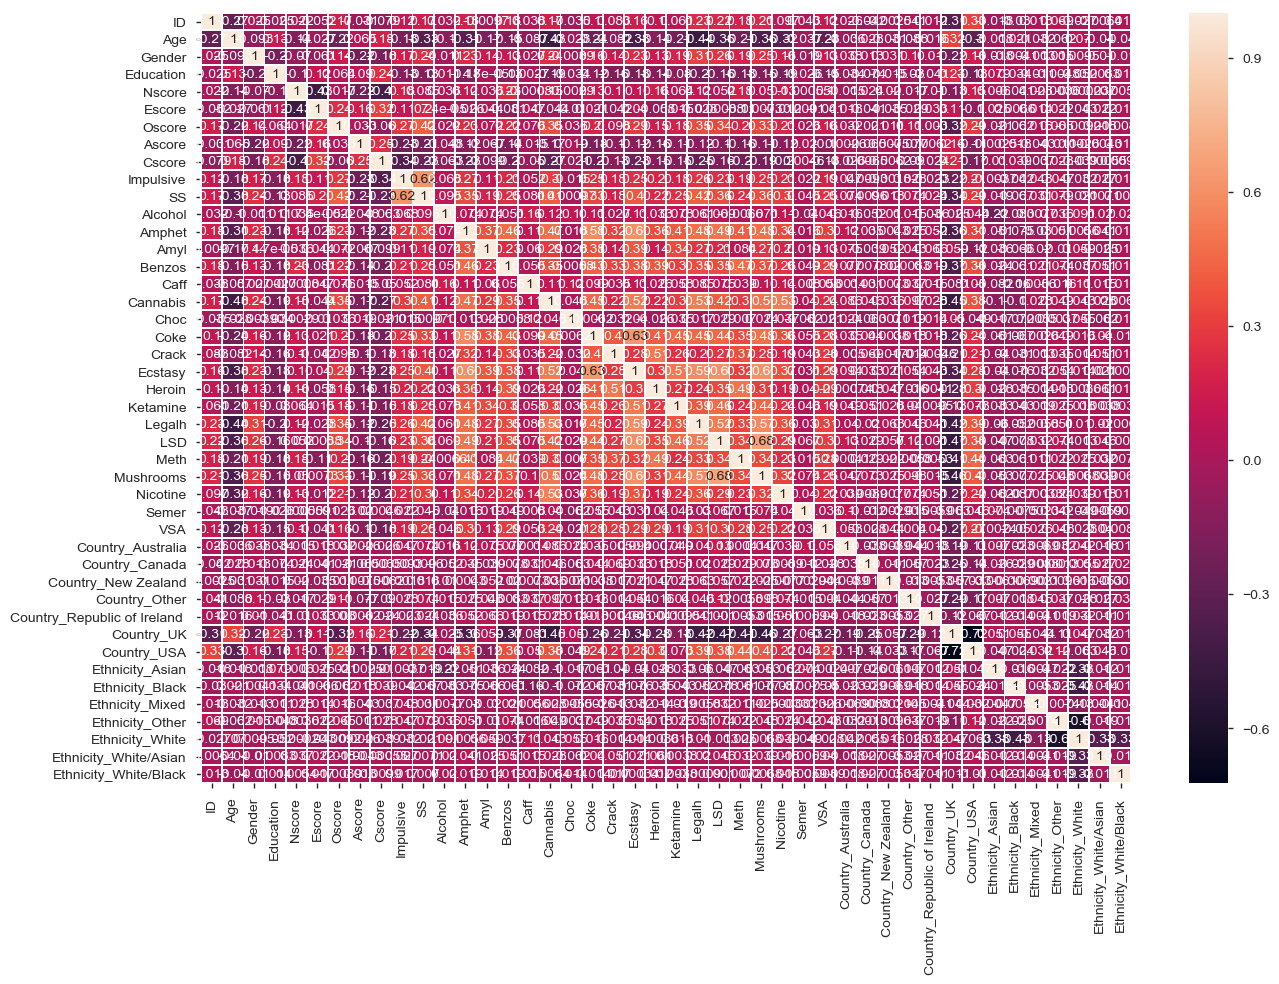

In [86]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True ,  linewidth = 0.5 )

In [91]:
def plot_percent_bar(df,column):
    # group Dataframe by preferred column
    groups = list(df.groupby(column))
    # create list for x_axis
    r = []
#     create list for green bar
    green = []
#     loop through groups and append data to green bar and r
    for i in range(0,len(groups)):
        used =  len(groups[i][1][groups[i][1]['Coke'] == 1])
        r_ready = groups[i][1].reset_index()
        df = len(groups[i][1])

        r.append(str(r_ready.loc[0, column]) + ', ' + str(df))

        green.append(used/df*100)
        
    red = [100-i for i in green]
    plt.bar(r, green,
        color='teal',
        edgecolor='white',
        width = 0.85
           )
    plt.bar(r, red,
        color='coral',
        bottom=green,
        edgecolor='white',
        width = 0.85,
        )
    plt.ylabel(column.capitalize())

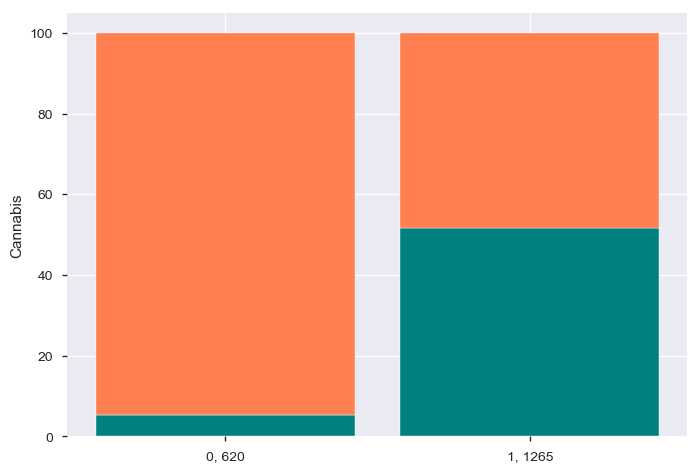

In [92]:
plot_percent_bar(df, 'Cannabis')

In [ ]:
df.shape

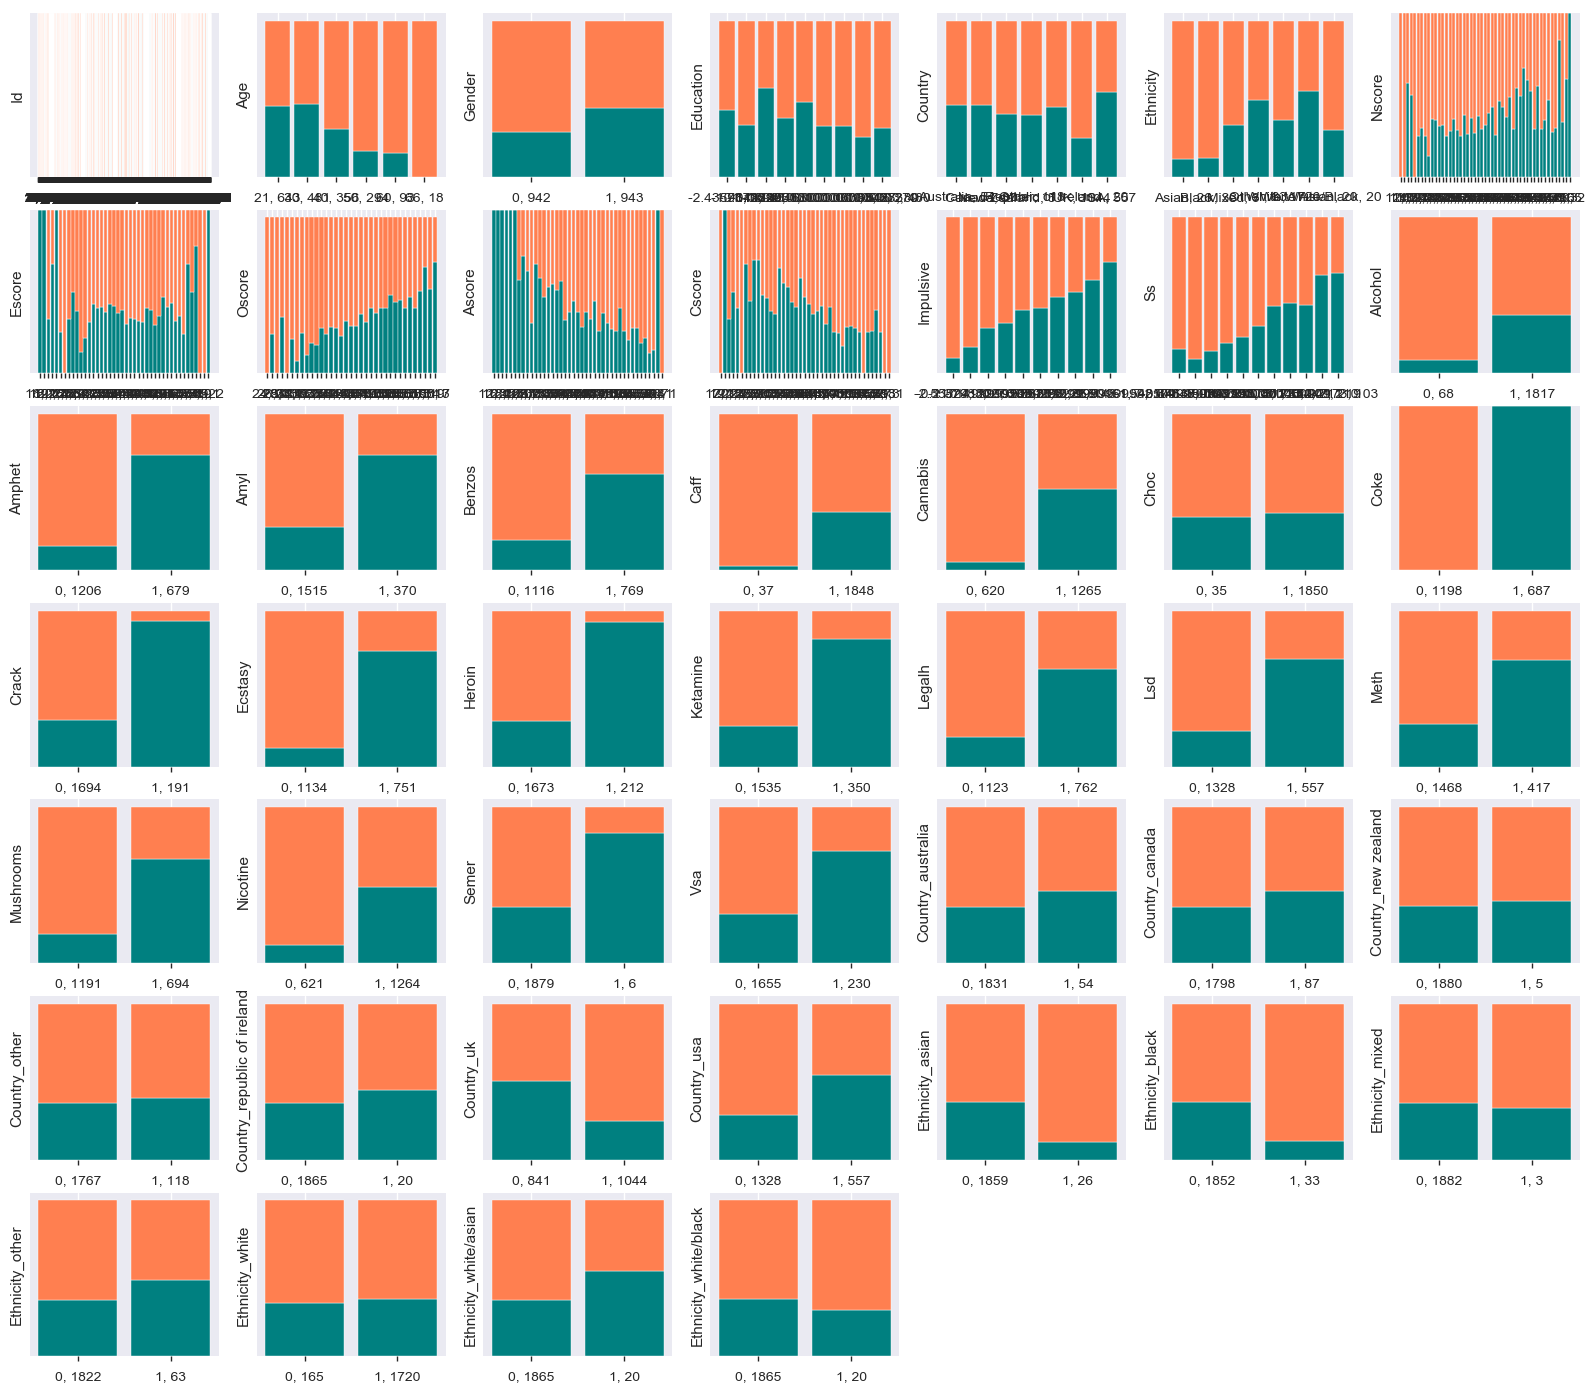

In [96]:
cols = list(df.columns)
plt.figure(figsize = (20,20))

for i, col in enumerate(cols):
    plt.subplot(8,7,i+1)
    plot_percent_bar(df, col)
    plt.yticks([])

In [ ]:
# bins = np.arange(1,20,1)
# plt.figure(figsize=(16,6))
# plt.bar(bins+0,count_of_users,width=0.4,label ='User')
# plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User')
# plt.xticks(bins,columns,rotation=50,fontsize=13)
# plt.ylabel("Count",fontsize=13)
# plt.title("Drug Vs User Or Non-user",fontsize=15)
# plt.legend()

**Feature Selection**

In [132]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix, recall_score


In [94]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'Country_Australia', 'Country_Canada',
       'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland ',
       'Country_UK', 'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Mixed', 'Ethnicity_Other', 'Ethnicity_White',
       'Ethnicity_White/Asian', 'Ethnicity_White/Black'],
      dtype='object')

In [95]:
# Split data to be used in the models
# Create matrix of features
X = df.drop(['Coke','ID','Country', 'Ethnicity' ], axis = 1) # grabs everything else but 'default payment next month'

# Create target variable
y = df['Coke'] # y is the column we're trying to predict

feature_cols = X.columns


In [96]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [97]:
# we Scaled the data by robust scaling bec minmax scaling is sensitive to outliers
# Robust use interquartiles scaling 
rc = RobustScaler()
X_train_scaled= rc.fit_transform(X_train)
X_test_scaled = rc.transform(X_test)

In [98]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

<h1>Logistic Regression/Baseline Model 

In [122]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.01, 0.02, 0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [123]:
# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv = 5 , scoring='f1') 

In [124]:
# Fit grid search
model = clf_gs.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [125]:
# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [126]:
y_pred_train = model.best_estimator_.predict(X_train_scaled)

y_pred_test = model.best_estimator_.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.811284046692607
Testing F1 Score: 0.7976878612716762


In [127]:
model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params

[('Ecstasy', 1.173866602636885),
 ('Crack', 0.9527448168360781),
 ('Cannabis', 0.8959757592466195),
 ('Heroin', 0.8626088968827657),
 ('Amphet', 0.8434618516094835),
 ('Nicotine', 0.748267480364832),
 ('Ketamine', 0.568165537776774),
 ('Amyl', 0.5499329838875),
 ('Gender', -0.33865507785587584),
 ('Benzos', 0.32881849437253197),
 ('Country_UK', 0.3058055000085504),
 ('Age', 0.3023381763490561),
 ('Country_Australia', -0.2774282882621754),
 ('Ascore', -0.27548233776918607),
 ('Mushrooms', 0.26096624177164335),
 ('Alcohol', 0.2469411926306026),
 ('Meth', 0.24429597475674578),
 ('Caff', 0.22176700823618717),
 ('SS', 0.21222113343853935),
 ('Legalh', 0.20928075175896763),
 ('Oscore', -0.2008686758005472),
 ('Ethnicity_Other', 0.18063648257392018),
 ('Escore', 0.17588464160719602),
 ('Education', 0.17335053599609732),
 ('LSD', 0.14772517670139432),
 ('Ethnicity_White/Black', -0.13989093591101665),
 ('Semer', 0.10419054681182667),
 ('VSA', 0.10414626319405738),
 ('Ethnicity_Asian', -0.100628

In [133]:
#check overall metrics on test data
print('Accuracy:',accuracy_score(y_test, y_pred_test))
print('Precision:',precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1:', f1_score(y_test, y_pred_test))

Accuracy: 0.8516949152542372
Precision: 0.7752808988764045
Recall: 0.8214285714285714
F1: 0.7976878612716762


In [134]:
#plot confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[264  40]
 [ 30 138]]


<h1> Random Forest
   

In [99]:
# run a RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [100]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV



rfc_pred = rfc.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.8559322033898306
Test F1 score:  0.8057142857142857


In [114]:
param_grid = { 
    'n_estimators': [200,300,400], # nb of threes
    'max_features': ['auto', 0.25, 0.33, 0.5, 1 ], # percentages of ouf featues you gonna put it in the tree.
    'max_depth' : [None,5,6,7,8,9],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}



In [115]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 300, 400], 'max_features': ['auto', 0.25, 0.33, 0.5], 'max_depth': [None, 5, 6, 7, 8, 9], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
CV_rfc.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 0.03,
 'n_estimators': 300}

In [120]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.836864406779661
Test F1 score:  0.7793696275071632


In [140]:
#check overall metrics on test data
print('Accuracy:',accuracy_score(y_test, rfc_pred))
print('Precision:',precision_score(y_test, rfc_pred))
print('Recall:', recall_score(y_test, rfc_pred))
print('F1:', f1_score(y_test, rfc_pred))

Accuracy: 0.836864406779661
Precision: 0.7513812154696132
Recall: 0.8095238095238095
F1: 0.7793696275071632


In [141]:
#plot confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[259  45]
 [ 32 136]]


In [107]:
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

In [109]:
print(metrics.classification_report(y_test, model_test))


NameError: name 'model_test' is not defined

In [ ]:
param_grid = { 
    'n_estimators': [200,300,400], # nb of threes
    'max_features': [0.25, 0.33, 0.5 ], # percentages of ouf featues you gonna put it in the tree.
    'max_depth' : [5,6,7,8,9],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]

In [ ]:
# CL0  	Never Used
# CL1 	Used over a Decade Ago
# CL2 	Used in Last Decade
# CL3 	Used in Last Year
# CL4 	Used in Last Month
# CL5 	Used in Last Week
# CL6 	Used in Last Day
